<a href="https://colab.research.google.com/github/pankajti/qtw/blob/master/Risk_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install eia
from IPython.display import clear_output
clear_output()

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import requests
import eia

# Step 3

## Macroeconomic Data


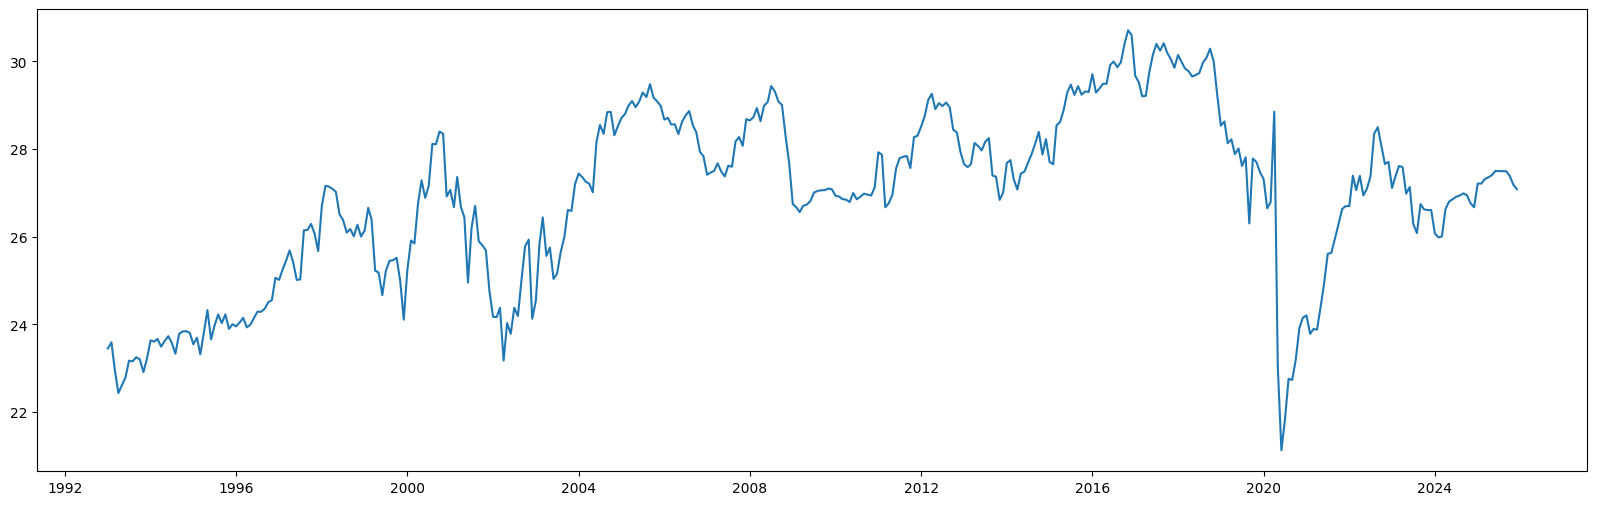

In [37]:
import eia
import pandas as pd
import requests
import numpy as np
# the API key we recieved from EIA
# Initiates a session with the EIA datacenter to recieve datasets
eia_key = r'KhUGeRcdKwP8WpygPCSDasWyaRburTqyE9er7aUN'

series='STEO.COPR_OPEC.M'
url_data = 'http://api.eia.gov/v2/seriesid/{}?api_key={}&out=json'
values_dict = {}
search = requests.get(url_data.format(series, eia_key))
eia_data = pd.DataFrame(search.json().get('response').get('data'))
eia_data=eia_data.set_index('period')
import datetime # Using the datetime library
def convert_to_datetime(input):
    return datetime.datetime.strptime(input[:9], "%Y-%m").date();
# Apply to entire index
eia_data.index = eia_data.index.map(convert_to_datetime);
# Convert dataframe index to datetime64[ns] index
eia_data.index = pd.to_datetime(eia_data.index);
eia_data= eia_data[['value']]
# pgmpy stores the column names as the variable name
eia_data.columns = [series];
eia_data.replace('-', np.nan, regex=True, inplace=True);
eia_data.replace('No Data Reported', np.nan, regex=True, inplace=True);
eia_data.loc[eia_data[ series]=='No Data Reported']=np.NAN
# Backward fill the holes, by filling them with the data infront.
eia_data.fillna(method='bfill', inplace=True);


def clean_EIA(data):
    data.replace('-', np.nan, regex=True, inplace=True);
    data.fillna(method='bfill', inplace=True);
    data.index = data.index.map(convert_to_datetime);
    data.index = pd.to_datetime(data.index);
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6));
ax.plot(eia_data)
plt.show()

In [ ]:
eia_data.head()

## Microeconomics Data

## Analysis of microeconomic data
* Production
* Stock
* imports
* Price of crude oil

In [3]:
api_url = "https://api.eia.gov/v2/crude-oil-imports/data/?frequency=monthly&data[0]=quantity&facets[originType][]=WORLD&facets[destinationType][]=US&facets[destinationId][]=US&facets[gradeId][]=MED&facets[originId][]=WORLD&start=2018-01&end=2023-10&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000"

# Replace 'your_api_key' with your actual EIA API key
api_key = 'eUHpyXZoiSdhtoFkoVXZa3xhG6YUY2w1fJxpVUlI'
api_url_with_key = f"{api_url}&api_key={api_key}"
response = requests.get(api_url_with_key)

# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Assuming the relevant data is in a list under 'response' -> 'data'
    # You will need to adjust the keys based on the actual structure of the response
    data_list = data.get('response', {}).get('data', [])

    # Create a DataFrame from the data
    df = pd.DataFrame(data_list)

    # Show the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Error fetching data: {response.status_code}")

    period originId originName originType originTypeName destinationId  \
0  2018-01    WORLD      World      WORLD          World            US   
1  2018-02    WORLD      World      WORLD          World            US   
2  2018-03    WORLD      World      WORLD          World            US   
3  2018-04    WORLD      World      WORLD          World            US   
4  2018-05    WORLD      World      WORLD          World            US   

  destinationName destinationType destinationTypeName gradeId gradeName  \
0   United States              US       United States     MED    Medium   
1   United States              US       United States     MED    Medium   
2   United States              US       United States     MED    Medium   
3   United States              US       United States     MED    Medium   
4   United States              US       United States     MED    Medium   

   quantity    quantity-units  
0     72936  thousand barrels  
1     54097  thousand barrels  
2     68

In [4]:
print(df.describe())

           quantity
count     70.000000
mean   56512.957143
std     9103.485627
min    37769.000000
25%    50333.250000
50%    55727.000000
75%    61437.750000
max    79358.000000


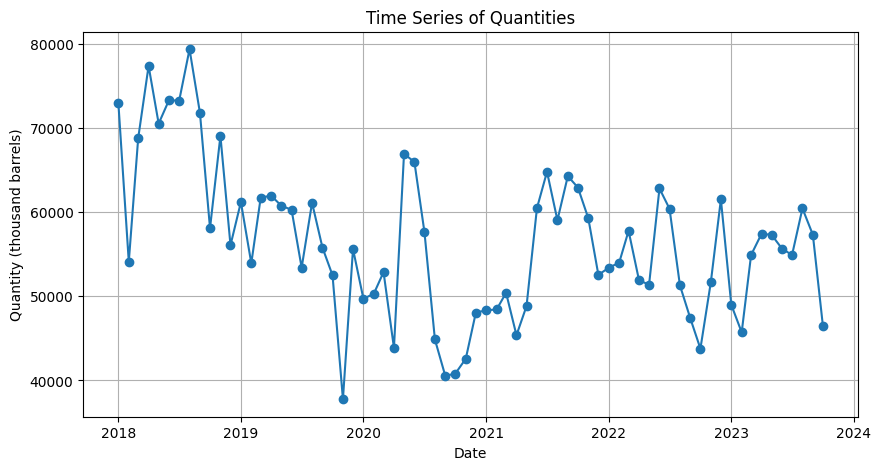

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'period' to datetime
df['period'] = pd.to_datetime(df['period'])

# Ensure the data is sorted by date
df.sort_values('period', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(df['period'], df['quantity'], marker='o')
plt.title('Time Series of Quantities')
plt.xlabel('Date')
plt.ylabel('Quantity (thousand barrels)')
plt.grid(True)
plt.show()

In [6]:
prod_api_url = "https://api.eia.gov/v2/petroleum/crd/crpdn/data/?frequency=monthly&data[0]=value&start=2018-01&end=2023-10&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000"

# Replace 'your_api_key' with your actual EIA API key
api_key = 'eUHpyXZoiSdhtoFkoVXZa3xhG6YUY2w1fJxpVUlI'
api_url_with_key = f"{prod_api_url}&api_key={api_key}"
response = requests.get(api_url_with_key)
# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Assuming the relevant data is in a list under 'response' -> 'data'
    # You will need to adjust the keys based on the actual structure of the response
    data_list = data.get('response', {}).get('data', [])

    # Create a DataFrame from the data
    df2 = pd.DataFrame(data_list)

    # Show the first few rows of the DataFrame
    print(df2.head())
else:
    print(f"Error fetching data: {response.status_code}")

    period duoarea area-name product product-name process      process-name  \
0  2018-01     R5F        NA    EPC0    Crude Oil     FPF  Field Production   
1  2018-01     R50    PADD 5    EPC0    Crude Oil     FPF  Field Production   
2  2018-01     SAK    USA-AK    EPC0    Crude Oil     FPF  Field Production   
3  2018-01     SLA    USA-LA    EPC0    Crude Oil     FPF  Field Production   
4  2018-01     SIL    USA-IL    EPC0    Crude Oil     FPF  Field Production   

     series                                 series-description  value   units  
0  MCRFP5F1  Federal Offshore PADD 5 Field Production of Cr...    419    MBBL  
1  MCRFPP52  West Coast (PADD 5) Field Production of Crude ...    976  MBBL/D  
2  MCRFPAK2  Alaska Field Production of Crude Oil (Thousand...    508  MBBL/D  
3  MCRFPLA1  Louisiana Field Production of Crude Oil (Thous...   3856    MBBL  
4  MCRFPIL2  Illinois Field Production of Crude Oil (Thousa...     19  MBBL/D  


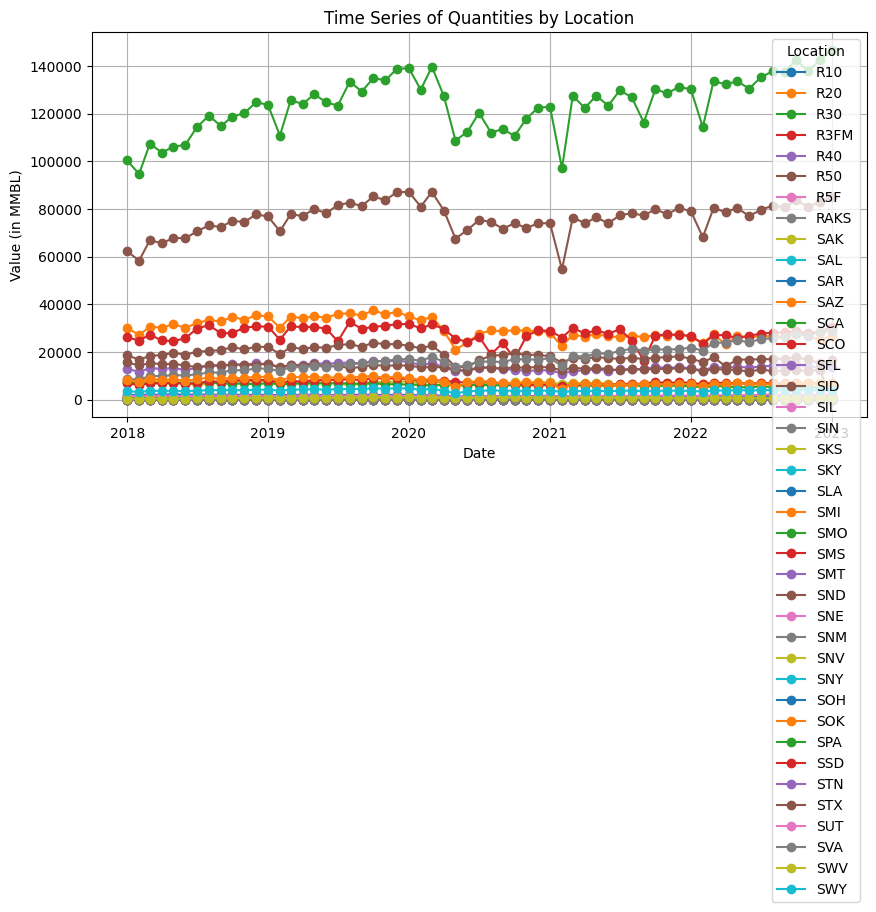

In [7]:
# Convert 'period' to datetime
df2['period'] = pd.to_datetime(df2['period'])
df2.sort_values('period', inplace=True)
pivot_df = df2.pivot_table(index='period', columns='duoarea', values='value')

# Plot the time series data
plt.figure(figsize=(10, 5))

# Loop through the columns (locations) to plot them
for location in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[location], marker='o', label=location)

# Add title and labels
plt.title('Time Series of Quantities by Location')
plt.xlabel('Date')
plt.ylabel('Value (in MMBL)')

# Add grid and legend
plt.grid(True)
plt.legend(title='Location')

# Show the plot
plt.show()

In [23]:
df2

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2018-01-01,R5F,NA,EPC0,Crude Oil,FPF,Field Production,MCRFP5F1,Federal Offshore PADD 5 Field Production of Cr...,419,MBBL
59,2018-01-01,SCA,CALIFORNIA,EPC0,Crude Oil,FPF,Field Production,MCRFPCA2,California Field Production of Crude Oil (Thou...,454,MBBL/D
58,2018-01-01,R10,PADD 1,EPC0,Crude Oil,FPF,Field Production,MCRFPP12,East Coast (PADD 1) Field Production of Crude ...,53,MBBL/D
57,2018-01-01,SKY,USA-KY,EPC0,Crude Oil,FPF,Field Production,MCRFPKY1,Kentucky Field Production of Crude Oil (Thousa...,63,MBBL
56,2018-01-01,SKY,USA-KY,EPC0,Crude Oil,FPF,Field Production,MCRFPKY2,Kentucky Field Production of Crude Oil (Thousa...,2,MBBL/D
...,...,...,...,...,...,...,...,...,...,...,...
4942,2023-01-01,SKS,USA-KS,EPC0,Crude Oil,FPF,Field Production,MCRFPKS1,Kansas Field Production of Crude Oil (Thousand...,2346,MBBL
4941,2023-01-01,STN,USA-TN,EPC0,Crude Oil,FPF,Field Production,MCRFPTN2,Tennessee Field Production of Crude Oil (Thous...,0,MBBL/D
4940,2023-01-01,SUT,USA-UT,EPC0,Crude Oil,FPF,Field Production,MCRFPUT2,Utah Field Production of Crude Oil (Thousand B...,129,MBBL/D
4958,2023-01-01,SWV,USA-WV,EPC0,Crude Oil,FPF,Field Production,MCRFPWV1,West Virginia Field Production of Crude Oil (T...,1596,MBBL


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              5000 non-null   datetime64[ns]
 1   duoarea             5000 non-null   object        
 2   area-name           5000 non-null   object        
 3   product             5000 non-null   object        
 4   product-name        5000 non-null   object        
 5   process             5000 non-null   object        
 6   process-name        5000 non-null   object        
 7   series              5000 non-null   object        
 8   series-description  5000 non-null   object        
 9   value               5000 non-null   int64         
 10  units               5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 468.8+ KB


In [22]:
df2['product-name'].unique()

array(['Crude Oil', 'ANS Crude Oil'], dtype=object)

In [15]:
df2.units.unique()

array(['MBBL', 'MBBL/D'], dtype=object)

In [18]:
df2.head().loc[58]

period                                              2018-01-01 00:00:00
duoarea                                                             R10
area-name                                                        PADD 1
product                                                            EPC0
product-name                                                  Crude Oil
process                                                             FPF
process-name                                           Field Production
series                                                         MCRFPP12
series-description    East Coast (PADD 1) Field Production of Crude ...
value                                                                53
units                                                            MBBL/D
Name: 58, dtype: object

In [29]:
stock_data_url = r'https://api.eia.gov/v2/petroleum/stoc/cu/data/?frequency=monthly&data[0]=value&facets[product][]=EPC0&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={}'.format(api_key)
stock_data= requests.get(stock_data_url)
stock_data_df = pd.DataFrame(stock_data.json()['response']['data'])
#stock_data_df.head()
stock_data_df_shrt = stock_data_df[['period','duoarea','area-name','series','value']]

In [28]:
stock_data_df['product'].unique()

array(['EPC0'], dtype=object)

In [24]:
stock_data_df.units.unique()

array(['MBBL'], dtype=object)

In [30]:
stock_data_df_shrt.head()

,period,duoarea,area-name,series,value
0,2023-10,R10,PADD 1,MCRSFP11,2059
1,2023-10,R50,PADD 5,MCRSFP51,23381
2,2023-10,R40,PADD 4,MCRSFP41,21363
3,2023-10,R20,PADD 2,MCRSFP21,92477
4,2023-10,R30,PADD 3,MCRSFP31,193850


<ipython-input-32-a9a7295b8ea1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_df_shrt.groupby('period').sum().plot()


<Axes: xlabel='period'>

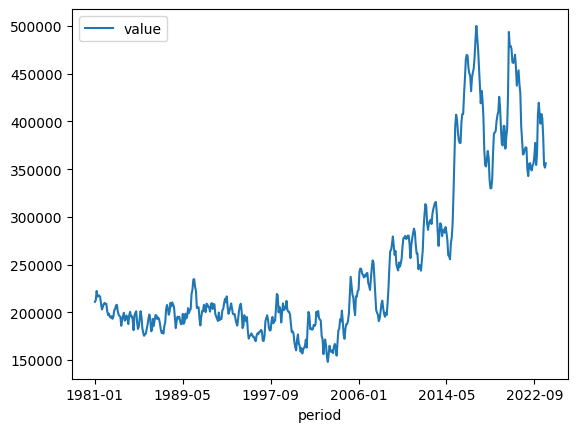

In [32]:
stock_data_df_shrt.groupby('period').sum().plot()

## Financial Data

In [ ]:
# Define the ticker symbols for major global oil companies and crude oil
tickers = {
    "Exxon Mobil": "XOM",
    "Royal Dutch Shell": "SHEL",
    "BP": "BP",
    "Chevron": "CVX",
    "TotalEnergies": "TTE",
    "Brent Crude": "BZ=F",
    "WTI Crude": "CL=F"
}

# Fetch historical data for each ticker
data = {}
for name, ticker in tickers.items():
    ticker_data = yf.Ticker(ticker)
    data[name] = ticker_data.history(start="2018-01-01", interval="1mo")['Close']

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(15, 8))
for name in df.columns:
    plt.plot(df.index, df[name], label=name)

plt.title("Stock Prices of Major Global Oil Companies and Crude Oil Prices")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.show()

# Step 4

## Data Dictionary
* Macroeconomic Data
* Microeconomic Data
* Financial Data
-Stock prices


